# CARACTWRÍSTICAS GEOMÉTRICAS<a class="tocSkip">
## RECONOCIMIENTO DE PATRONES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**
---

# Ejemplo: Extracción de Características Geométricas

En este ejemplo se muestra la extracción de características de geometría tales como:

* Características básicas
* Características elípticas
* Características basadas en momentos invariantes

Los ejemplos 1,2 y 3 se realizan en radiografías de frutas.

El ejemplo 4 consiste en clasificar tres tipos de flechas.

Referencias:

* [Teoría sobre extracción de características](https://www.dropbox.com/s/ir3mh7b2reuieg7/PAT02_GeometricFeatures.pdf?dl=0)

* [Paper sobre momentos de Hu](https://www.dropbox.com/s/9kf67a1ihlqbamn/Hu_Moments.pdf?dl=0)

* [Paper sobre momentos de Flusseer](https://www.dropbox.com/s/ki0mrexq1e2vy36/Flusser_Moments.pdf?dl=0)



# 0. Setup inicial

Liberías necesarias para que funcione el algoritmo.

## Instalación de PyXvis

PyXvis es una librería creada recientemente para el libro [Computer Vision for X-ray Testing](https://domingomery.ing.puc.cl/publications/book/) (Mery & Pieringer, Springer, 2021). En los ejemplos de este notebook, se utiliza esta librería sólo para la extracción de características. Por el momento. como la instalación de PyXvis usando 'pip install pyxvis' es inestable, usaremos esta instalación: 

In [ ]:
# Instalación de PyXvis

!wget https://www.dropbox.com/s/54jfodpv1h4d0kl/pyxvis.zip
!unzip pyxvis.zip
!rm pyxvis.zip
print('PyXvis library downloaded.')
!pip install scipy==1.2
!pip3 install pybalu==0.2.5
!pip install ./pyxvis
print('PyXvis library installed.')


## Setup de librerías

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from   skimage.measure import label
from   pyxvis.processing.segmentation import seg_bimodal
from   pyxvis.features.extraction import extract_features
from   pyxvis.io.plots import plot_ellipses_image
from   sklearn.metrics import confusion_matrix, accuracy_score

ModuleNotFoundError: No module named 'base'

# 1. Carga de Imágenes

Se cargan dos imágenes N0001_0004b.png y N0006_0003b.png. Estas imágenes pertenecen a la base de datos [GDXray](https://domingomery.ing.puc.cl/material/gdxray/).

In [ ]:
!wget https:https://www.dropbox.com/s/szekiil3zniyldm/N0001_0004b.png?dl=0
!wget https://www.dropbox.com/s/l8l1t1eybl4oyas/N0006_0003b.png?dl=0

# Ejemplo 1: Características geométricas básicas

En este ejemplo, mostramos cómo extraer las características geométricas básicas de diez manzanas segmentadas en la imagen de rayos X N0001_0004b.png. La segmentación en este ejemplo se realiza umbralizando la imagen de rayos X y seleccionando aquellos objetos segmentados que presentan un tamaño (área) adecuado.

In [ ]:
# Input Imagen 1 para ejemplo 1
fig    = plt.figure()
ax     = fig.add_subplot(111)
img1    = plt.imread('N0001_0004b.png')
implot = plt.imshow(img1,cmap='gray') 


In [ ]:
# Input Image
img    = img1

# Segmentation   
R      = img>0.27         # thresholding of light objects
L      = label(R)         # labeling of objects
n      = np.max(L)        # number of detected objects
T      = np.zeros((n,18)) # features of each object will stored in a row

# Analysis of each segmented object
t      = 0 # count of recognized fruits
for i in range(n):
    R = (L == i)*1                         # binary image of object i
    f = extract_features('basicgeo',bw=R)  # feature extraction for object i
    area = f[4]
    # recognition of fruits according to the size
    if area>14000 and area<21000:
        T[t,:] = f                         # storing the features of the fruit t
        t = t+1
        # labeling each recognized fruit in the plot
        ax.text(f[1]-20, f[0]+10, str(t), fontsize=12,color='Red')

# Display and save results
plt.show()
F = T[0:t,:]
print('Basic Geo-Features:')
print(F)
np.save('GeoFeatures.npy',F)               # save features

Características extraidas con `extract_features` de PyXvis.

* $f_{1}$: Center of mass in $i$ direction.

* $f_{2}$: Center of mass in $j$ direction.

* $f_{3}$: Height.

* $f_{4}$: Width.

* $f_{5}$: Area.

* $f_{6}$: Perimeter.

* $f_{7}$: Roundness.

* $f_{8}$: Danielsson factor.

* $f_{9}$: Euler Number.

* $f_{10}$: Equivalent Diameter.

* $f_{11}$: Major Axis Length.

* $f_{12}$: Minor Axis Length.

* $f_{13}$: Orientation.

* $f_{14}$: Solidity.

* $f_{15}$: Extent.

* $f_{16}$: Eccentricity.

* $f_{17}$: Convex Area.

* $f_{18}$: Filled Area.

Features divided by 1000 of the ten apples:


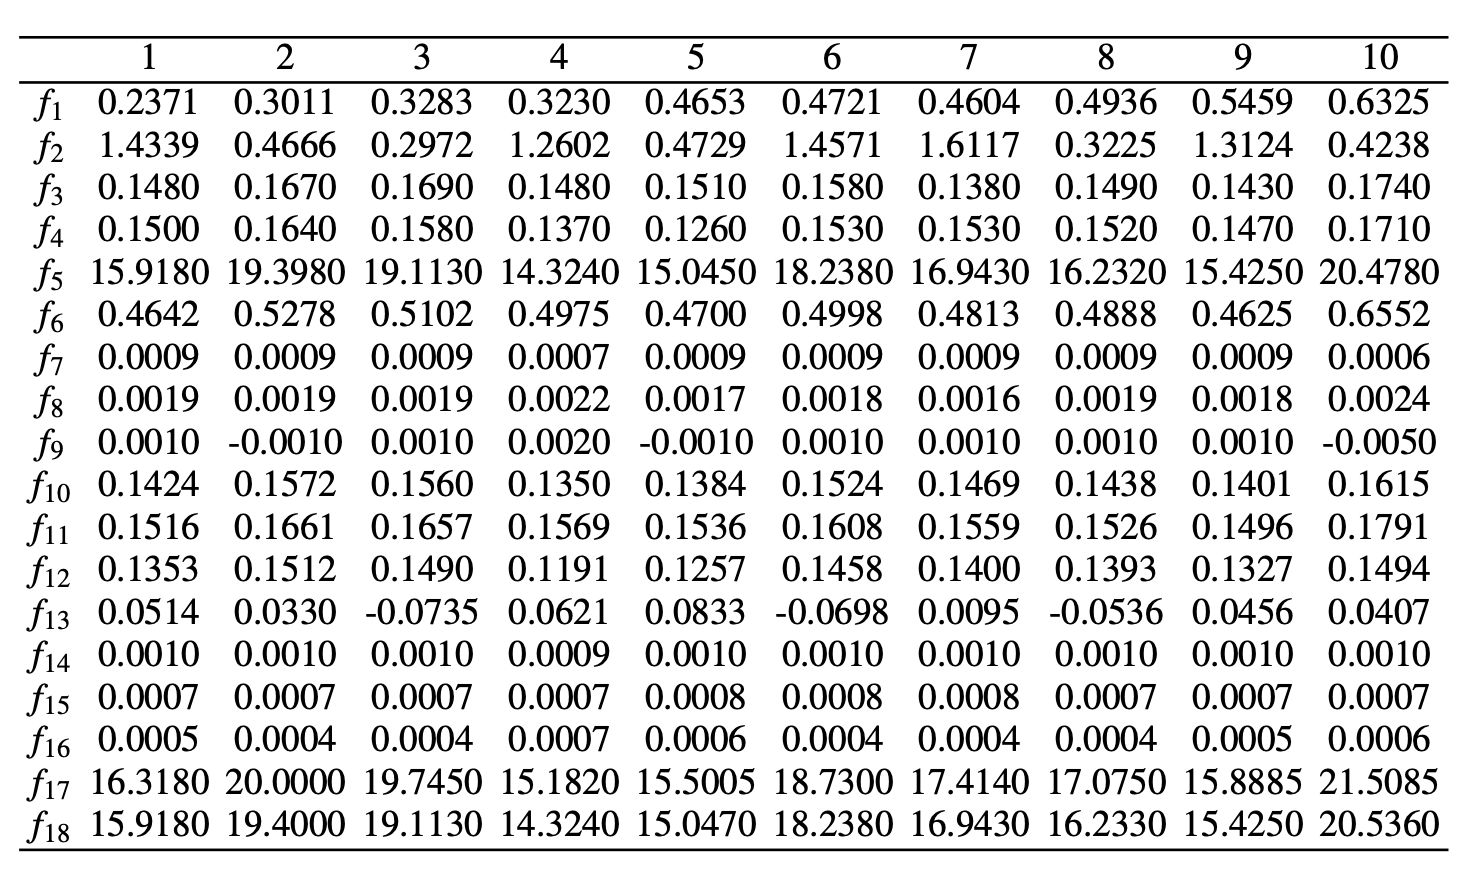

# Ejemplo 2: Características Elípticas

En este ejemplo, mostramos cómo extraer características elípticas del contorno de una fruta. Probamos este método en una radiografía de una cereza con forma elíptica como se muestra en el resultado.

In [ ]:
# Input Imagen 2 para ejemplo 2
fig    = plt.figure()
ax     = fig.add_subplot(111)
img2    = plt.imread('N0006_0003b.png')
implot = plt.imshow(img2,cmap='gray') 


In [ ]:
img    = img2                                    # input image with a fruit
R,_,   = seg_bimodal(img)                        # segmentation
fxell  = extract_features('ellipse',bw=R)        # extraction of elliptical features
print('Elliptical Features:')                    # show results
print(fxell)                                     # print elliptical features
plot_ellipses_image(img,fxell)                   # draw ellipse onto image
print('Note: The 7 values are: [Mass center: (io,jo) in pixels; Axis: (ae,be) in pixels; Orientation in grads; Eccentricity; Area in pixels]')

# Ejemplo 3: Momentos invariantes

En este ejemplo, mostramos cómo medir momentos invariantes que pueden utilizarse como característica de forma de los objetos de interés. Probamos este método con una radiografía que contiene 10 manzanas. Superponemos a esta imagen 4 rectángulos cuyo tamaño es de $a \times b$ píxeles (donde $b=3a$). Los rectángulos están situados en las direcciones horizontal y vertical, como se muestra en el resultado. Así, podemos simular una imagen de rayos X de entrada que contiene manzanas y rectángulos. La idea es separarlos. Vemos que el primer Hu-momento puede utilizarse para discriminar eficazmente las manzanas de los rectángulos.

In [ ]:
fig    = plt.figure()
ax     = fig.add_subplot(111)
img    = img1
img[100:399,750:849]  = 0.5
img[500:699,850:916]  = 0.75
img[20:119,100:399]   = 0.6
img[90:156,1000:1199] = 0.75
implot = plt.imshow(img,cmap='gray')    
R      = img>0.27   # segmentation
L      = label(R)   # labeling
n      = np.max(L)  # number of segmented objects
t      = 0
T      = np.zeros((n,7))
for i in range(n):
    R = (L == i)*1                      # binary image of object i
    fx = ['basicgeo','hugeo']           # extraction of basic geometric features and Hu moments
    f = extract_features(fx,bw=R)       # feature extraction
    area = f[4]
    # recognition of fruits according to the size
    if area>10000 and area<31000:      
        h      = f[18:]                 # hu moments
        T[t,:] = h
        t      = t+1
        x      = round(1000*h[0])       # first hu moment
        ax.text(f[1]-20, f[0]+10, str(int(x)), fontsize=12,color='Red')
plt.show()
F = T[0:t,:] 
print('Hu Features:')
print(F)
np.save('HuFeatures.npy',F)             # save features

Note: In this example, the features (basic geometric features for centroid and area, and Hu moments) are computed by  function `extract_features` of PyXvis  with parameters `['basicgeo','hugeo']` and `bw=R`, where `R` is the binary image from which the features are extracted. The output of this function is a vector `f` computed by concatenation of two vectors, one for the basic geometric features (of 18 elements) and one for the Hu moments (of 7 elements). Thus, the first Hu moment is stored in `f[18]`. The reader can test Flusser and Gupta moments using functions parameters `'flusser'` and `'gupta'` respectively in function `extract_features`.

# Ejemplo 4: Reconocimiento de Flechas

En este ejemplo se realiza un reconocimiento de tres tipos de flechas como las que se muestran en la figura. Las flechas son de diversos tamaños y diversas orientaciones. 

* Clase 0: flecha curva unidireccional

* Clase 1: flecha recta bidireccional

* Clase 2: flecha recta unidireccional

Para la solución se utiliza los momentos de Hu ya que son invariantes a la rotación y a la escala.



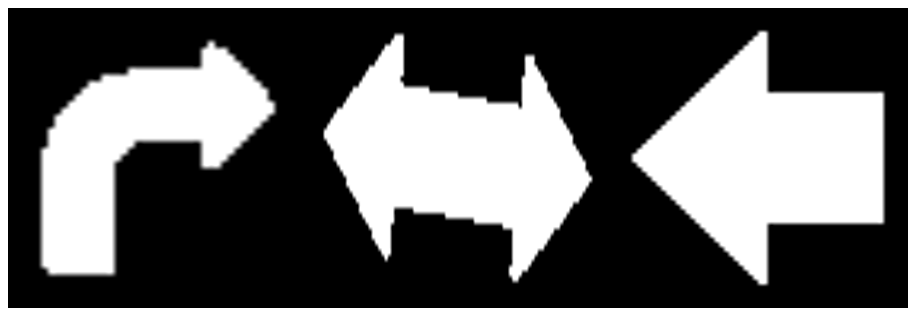

In [ ]:
# Datos de Training: 3 clases y 12 imágenes por clase

!wget https://www.dropbox.com/s/akyfekiterkid5n/arrows_training.zip
!unzip arrows_training


In [ ]:
# Datos de Testing: 3 clases y 10 imágenes por clase


!wget https://www.dropbox.com/s/bdu7640x7059rfh/arrows_testing.zip
!unzip arrows_testing

In [ ]:
# Funciones necesarias para que se pueda cargar una imagen individual

def num2fixstr(x,d):
  # example num2fixstr(2,5) returns '00002'
  # example num2fixstr(19,3) returns '019'
  st = '%0*d' % (d,x)
  return st

def ImageLoad(prefix,num_char,num_img,echo='off'):
  # img = ImageLoad('example/char_',1,3)   loads image 'example/char_01_003.png'
  # img = ImageLoad('example/char_',2,15)  loads image 'example/char_02_015.png'
  st   = prefix + num2fixstr(num_char,2) + '_' + num2fixstr(num_img,2) + '.png'
  if echo == 'on':
    print('loading image '+st+'...')
  img    = plt.imread(st)
  return img

In [ ]:
# Extracción de momentos de Hu para el training

K = 3  # número de clases
N = 12 # número de imágenes por clase

fx = ['hugeo']                      # características a extraer (momentos de Hu)
M  = 7                              # los momentos de Hu son 7

# si se quiere usar momentos de Flusser se puede usar fx = ['flusser'] y M = 4

Xtrain = np.zeros((K*N,M))          # K x N muestras (filas), y M características (columnas)
ytrain_gt = np.zeros((K*N,))        # ground truth (clasificacion ideal)

t = 0
for j in range(K):                  # para cada clase
  for i in range(N):                # para cada imagen de la clase
    # Lectura de la imagen
    img    = ImageLoad('arrows_training/arrow',j+1,i+1,echo='on')
    # Extracción de características
    R      = (img>0.5)*1            # segmentation
    f = extract_features(fx,bw=R)   # feature extraction
    Xtrain[t,:] = f
    ytrain_gt[t] = j
    t = t+1


In [ ]:
# Extracción de momentos de Hu para el testing

Nt = 10 # número de imágenes por clase en el testing

Xtest = np.zeros((K*Nt,M))          # features
ytest_gt = np.zeros((K*Nt,))        # ground truth (clasificacion ideal)

t = 0
for j in range(K):                  # para cada clase
  for i in range(Nt):               # para cada imagen de la clase
    # Lectura de la imagen
    img    = ImageLoad('arrows_testing/arrow',j+1,i+1,echo='on')
    # Extracción de características
    R      = (img>0.5)*1            # segmentation
    f = extract_features(fx,bw=R)   # feature extraction
    Xtest[t,:] = f
    ytest_gt[t] = j
    t = t+1


In [ ]:
# Distribución de frecuencias por clase
# Los momentos de Hu son 7, y se han almacenados como 7 columnas en la matriz
# Xtrain, el primer momento de Hu es la columna cero:
hu = 0 # 0 es el primer momento, 1 es el segundo momento, etc.
sns.displot([Xtrain[0:12,hu],Xtrain[12:24,hu],Xtrain[24:36,hu]],bins=20)


In [ ]:
# Clasificacion
# Claramente las clases se separan con dos umbrales que en este caso se escogen 
# de manera manual:

th1 = 0.20
th2 = 0.28

# Clasificación en el Testing (K x Nt = 30 muestras, 10 por cada una de las tres clases)
xtest  = Xtest[:,hu]
n = K*Nt
ytest  = np.zeros((n,))
for i in range(n):
  if xtest[i]<th1:
    ytest[i] = 2
  elif xtest[i]<th2:
    ytest[i] = 1
  # otro elif no es necesario porque ytest[i] se inicializó en cero

In [ ]:
# Evaluación de desempeño

C = confusion_matrix(ytest_gt, ytest)
print('Matriz de Confusión:')
print(C)
print(' ')
Acc = accuracy_score(ytest_gt, ytest)
print('Accuracy:')
print(Acc)
